# Wolverine Glacier
## Benchmark glacier run

In [27]:
import firedrake
import icepack
import geojson

In [29]:
import geojson

outline_filename = "/home/jon/Desktop/alaska_run/wolverine_outline.geojson"
with open(outline_filename, "r") as outline_file:
    outline = geojson.load(outline_file)

In [30]:
print(outline["crs"]["properties"]["name"])

urn:ogc:def:crs:OGC:1.3:CRS84


In [31]:
import numpy as np

δ = 50e3
coords = np.array(list(geojson.utils.coords(outline)))
xmin, xmax = coords[:, 0].min() - δ, coords[:, 0].max() + δ
ymin, ymax = coords[:, 1].min() - δ, coords[:, 1].max() + δ

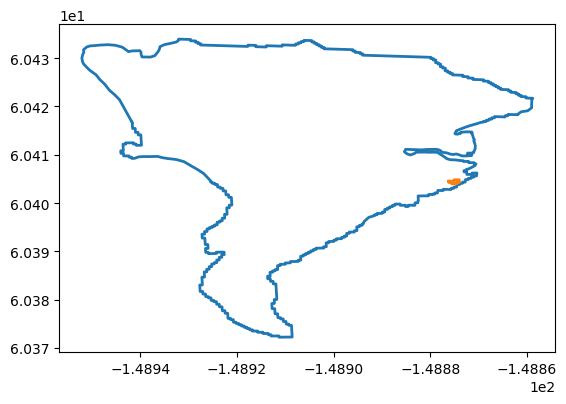

In [32]:
import icepack.plot

fig, axes = icepack.plot.subplots()

for feature in outline["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)

#axes.set_xlabel("meters");

In [33]:
geometry = icepack.meshing.collection_to_geo(outline)

with open("wolverine.geo", "w") as geo_file:
    geo_file.write(geometry.get_code())

In [34]:
!gmsh -2 -format msh2 -v 2 -o wolverine.msh wolverine.geo

In [35]:
import firedrake

mesh = firedrake.Mesh("wolverine.msh")

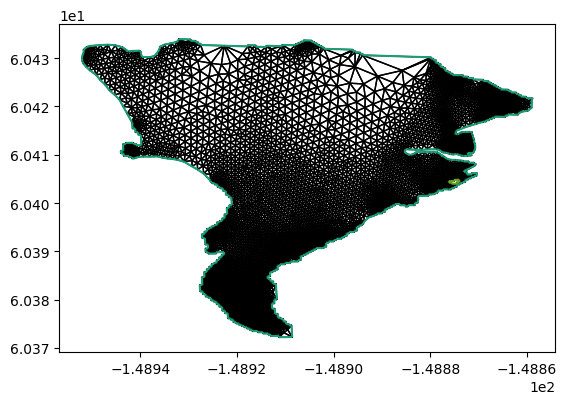

In [37]:
fig, axes = icepack.plot.subplots()
firedrake.triplot(mesh, axes=axes)
#axes.legend()